# Lending Tree Classification Project

### <a href="#wrangle">Data Wrangling and Exploratory Analysis</a>
### <a href="#preprocess">Pre-Processing and Modeling </a>

## <span id="wrangle">Data Wrangling</span>

In [1]:
#import the tools we will use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

loan_path = './data/lending_club_loans.csv'
data_info = './data/LCDataDictionary.csv'
df = pd.read_csv(loan_path, header=1)
info = pd.read_csv(data_info)

In [2]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Check how many rows and columns

In [3]:
df.shape

(42538, 115)

### Check that the types of each feature makes sense

In [4]:
## make a copy of the DF
loans = df.copy()

objects = list()
# use for loop to print every feature - .dtypes method only prints first and last few
for i, t in enumerate(loans.dtypes):
    if t == object:
        objects.append(loans.columns[i])
#         print("loans['{}'] = loans['{}'].map(lambda x: )".format(loans.columns[i],loans.columns[i]))

### View the features that are of type "object"        
loans.loc[1,objects]

id                                                               1077430
term                                                           60 months
int_rate                                                          15.27%
grade                                                                  C
sub_grade                                                             C4
emp_title                                                          Ryder
emp_length                                                      < 1 year
home_ownership                                                      RENT
verification_status                                      Source Verified
issue_d                                                         Dec-2011
loan_status                                                  Charged Off
pymnt_plan                                                             n
url                    https://lendingclub.com/browse/loanDetail.acti...
desc                     Borrower added on 12/22/11

### What needs to be changed? (My To Do List)

<b>id</b>: ?
<br><b>term</b>: drop months and convert to int64
<br><b>int_rate</b>: drop percent sign convert to float
<br><b>grade</b>: map to number system - keep the hash to use as legend later: or use built in one hot encoder
<br><b>sub_grade</b>: map to number system - keep the hash to use as legend later: or use built in one hot encoder
<br><b>emp_title</b>: ?
<br><b>emp_length</b>: possibly bin items - look at .value_counts
<br><b>home_ownership</b>: map to number system - keep the hash to use as legend later: or use built in one hot encoder
<br><b>verification_status</b>: map to number system - keep the hash to use as legend later: or use built in one hot encoder
<br><b>issue_d</b>: convert to datetime
<br><b>loan_status</b>: map to number system - keep the hash to use as legend later: or use built in one hot encoder
<br><b>pymnt_plan</b>: change to boolean, check .value_counts
<br><b>url</b>: ?
<br><b>desc</b>: ?
<br><b>purpose</b>: map to number system - keep the hash to use as legend later: or use built in one hot encoder
<br><b>title</b>: map to number system - keep the hash to use as legend later: or use built in one hot encoder
<br><b>zip_code</b>: convert to int64, check .value_counts
<br><b>addr_state</b>: map to number system - keep the hash to use as legend later: or use built in one hot encoder
<br><b>earliest_cr_line</b>: convert to datetime
<br><b>revol_util</b>: drop percent sign, convert to float
<br><b>initial_list_status</b>: map to number system - keep the hash to use as legend later: or use built in one hot encoder
<br><b>last_pymnt_d</b>: convert to datetime
<br><b>next_pymnt_d</b>: convert to datetime
<br><b>last_credit_pull_d</b>: convert to datetime
<br><b>application_type</b>: map to number system - keep the hash to use as legend later: or use built in one hot encoder

#### My To Do List Being done

In [5]:
# create the hash map to one hot encode each column
def mapper(df_unique_list):
    mapped = dict()
    for i, c in enumerate(df_unique_list):
        if c != np.NaN:
            mapped[c] = int(i)
    del mapped[np.NaN]
    return mapped

In [6]:
loans['term'] = loans['term'].map(lambda x: int(x.strip('months')), na_action="ignore")
loans['int_rate'] = loans['int_rate'].map(lambda x: float(x.strip('%')), na_action="ignore")
loans['grade'] = loans.grade.replace(mapper(loans.grade.unique()))
loans['sub_grade'] = loans.sub_grade.replace(mapper(loans.sub_grade.unique()))
loans['emp_title'] = loans['emp_title'].replace(mapper(loans.emp_title.unique()))
loans['emp_length'] = loans['emp_length'].map(lambda x: int(x.strip(' +<years')), na_action="ignore")
loans['home_ownership'] = loans['home_ownership'].replace(mapper(loans.home_ownership.unique()))
loans['verification_status'] = loans['verification_status'].replace(mapper(loans.verification_status.unique()))
loans['issue_d'] = loans['issue_d'].map(lambda x: pd.to_datetime(x))
loans['loan_status'] = loans['loan_status'].replace(mapper(loans.loan_status.unique()))
loans['pymnt_plan'] = loans['pymnt_plan'].replace(mapper(loans.pymnt_plan.unique()))
loans['desc'] = loans['desc'].replace(mapper(loans.desc.unique()))
loans['purpose'] = loans['purpose'].replace(mapper(loans.purpose.unique()))
loans['title'] = loans['title'].replace(mapper(loans.title.unique()))
loans['zip_code'] = loans['zip_code'].map(lambda x: int(x.strip('x')), na_action="ignore")
loans['addr_state'] = loans['addr_state'].replace(mapper(loans.addr_state.unique()))
loans['earliest_cr_line'] = loans['earliest_cr_line'].map(lambda x: pd.to_datetime(x))
loans['revol_util'] = loans['revol_util'].map(lambda x: float(x.strip('%')), na_action="ignore")
loans['initial_list_status'] = loans['initial_list_status'].replace(mapper(loans.initial_list_status.unique()))
loans['last_pymnt_d'] = loans['last_pymnt_d'].map(lambda x: pd.to_datetime(x))
loans['next_pymnt_d'] = loans['next_pymnt_d'].map(lambda x: pd.to_datetime(x))
loans['last_credit_pull_d'] = loans['last_credit_pull_d'].map(lambda x: pd.to_datetime(x))
loans['application_type'] = loans['application_type'].replace(mapper(loans.application_type.unique()))

# engineer a feature based on if the loans meet the credit policy
# 39786 is the index where the DF says that the loans do not meet the credit policy
loans['meet_credit_policy'] = loans.apply(lambda x: 1 if x.name > 39786 else 0, axis=1)

In [7]:
# find the rows with notes in the id column
isstr =loans.id.apply(lambda row: len(row)>6 if isinstance(row, str) else False)
loans.loc[isstr, ['id']]

,id
39786,Loans that do not meet the credit policy
42536,Total amount funded in policy code 1: 460296150
42537,Total amount funded in policy code 2: 0


In [8]:
## drop the rows with notes in the id column
loans = loans.drop(labels=[39786,42536,42537])

In [9]:
## now drop the id and url columns
loans = loans.drop(labels = ['id', 'url'], axis=1)

### How to handle Missing Values?

<AxesSubplot:>

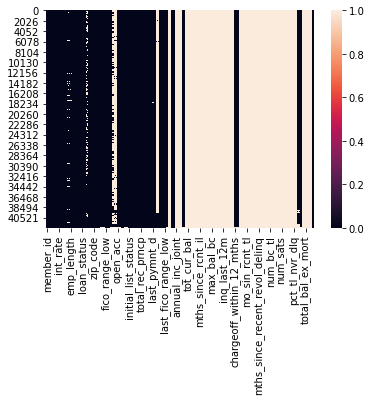

In [10]:
sns.heatmap(loans.isna())

#### check for any values in the column

In [11]:
dropping = list()
for i, empty in enumerate(loans.any()):
    if not empty:
        dropping.append(loans.columns[i])
dropped = loans.drop(labels=dropping, axis=1)

<AxesSubplot:>

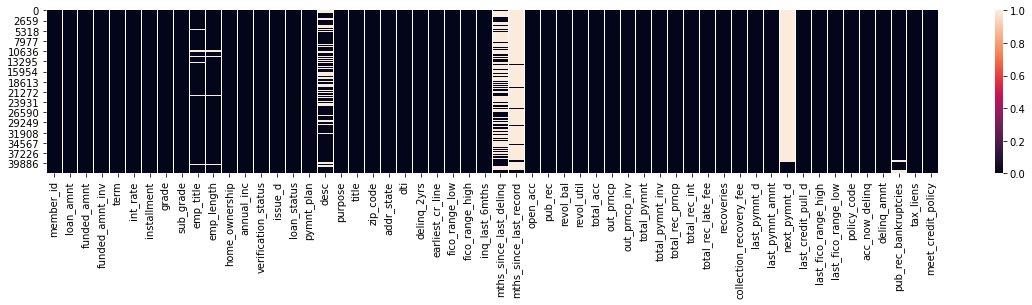

In [12]:
plt.figure(figsize=(20,3))
sns.heatmap(dropped.isna())

### Noting the percentage of missing data 

'next_pymnt_d' and 'mnths_since_last_record' columns are clearly missing more that 90% of its data. Let's look closer at 'mnths_since_last_delinq' and other rows

In [13]:
dropped.isnull().sum() * 100 / len(dropped)

member_id                   0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   6.173739
emp_length                  2.614318
home_ownership              0.000000
annual_inc                  0.009404
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
pymnt_plan                  0.000000
desc                       31.251910
purpose                     0.000000
title                       0.030563
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.068179
earliest_cr_line            0.068179
fico_range_low              0.000000
fico_range_high             0.000000
i

There is too much data missing from 'next_pymnt_d' and 'mths_since_last_record' so I will drop these columns. Next, I will use KNN Imputer to fill missing values based on similar instances. 

In [14]:
dropped.drop(columns=['next_pymnt_d', 'mths_since_last_record'], axis=1, inplace=True)

In [15]:
loans['issue_d'] = loans['issue_d'].map(lambda x: pd.to_datetime(x))
loans['earliest_cr_line'] = loans['earliest_cr_line'].map(lambda x: pd.to_datetime(x))
loans['last_pymnt_d'] = loans['last_pymnt_d'].map(lambda x: pd.to_datetime(x))
loans['last_credit_pull_d'] = loans['last_credit_pull_d'].map(lambda x: pd.to_datetime(x))

In [16]:
import datetime as dt

# get a datetime that is equal to epoch
epoch = dt.datetime(1970, 1, 1)


In [17]:
dropped['issue_d'] = dropped['issue_d'].map(lambda x:(pd.to_datetime(x) - epoch).total_seconds())
dropped['earliest_cr_line'] = dropped['earliest_cr_line'].map(lambda x:(pd.to_datetime(x) - epoch).total_seconds())
dropped['last_pymnt_d'] = dropped['last_pymnt_d'].map(lambda x:(pd.to_datetime(x) - epoch).total_seconds())
dropped['last_credit_pull_d'] = dropped['last_credit_pull_d'].map(lambda x:(pd.to_datetime(x) - epoch).total_seconds())

In [18]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2, weights='distance')
#drop columns with datetime 
# filled_arr = imputer.fit_transform(dropped.drop(columns=['last_credit_pull_d','last_pymnt_d','earliest_cr_line','issue_d']))
filled_arr = imputer.fit_transform(dropped)

In [19]:
filled = pd.DataFrame(filled_arr, columns=dropped.columns)

In [20]:
filled

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,meet_credit_policy
0,1296599.0,5000.0,5000.0,4975.0,36.0,10.65,162.87,0.0,0.0,2166.978765,...,171.62,1.472688e+09,744.0,740.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1314167.0,2500.0,2500.0,2500.0,60.0,15.27,59.83,1.0,1.0,1.000000,...,119.66,1.472688e+09,499.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1313524.0,2400.0,2400.0,2400.0,36.0,15.96,84.33,1.0,2.0,721.478503,...,649.91,1.472688e+09,719.0,715.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1277178.0,10000.0,10000.0,10000.0,36.0,13.49,339.31,1.0,3.0,2.000000,...,357.48,1.459469e+09,604.0,600.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1311748.0,3000.0,3000.0,3000.0,60.0,12.69,67.79,0.0,4.0,3.000000,...,67.79,1.472688e+09,694.0,690.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42530,73096.0,3500.0,3500.0,225.0,36.0,10.28,113.39,1.0,3.0,30516.075282,...,0.00,1.359677e+09,819.0,815.0,1.0,0.0,0.0,0.0,0.0,1.0
42531,72992.0,1000.0,1000.0,0.0,36.0,9.64,32.11,0.0,13.0,30657.000000,...,32.41,1.409530e+09,784.0,780.0,1.0,0.0,0.0,0.0,0.0,1.0
42532,70868.0,2525.0,2525.0,225.0,36.0,9.33,80.69,0.0,12.0,28853.499629,...,82.03,1.177978e+09,714.0,710.0,1.0,0.0,0.0,0.0,0.0,1.0
42533,70735.0,6500.0,6500.0,0.0,36.0,8.38,204.84,2.0,17.0,28853.499916,...,205.32,1.185926e+09,724.0,720.0,1.0,0.0,0.0,0.0,0.0,1.0


<AxesSubplot:>

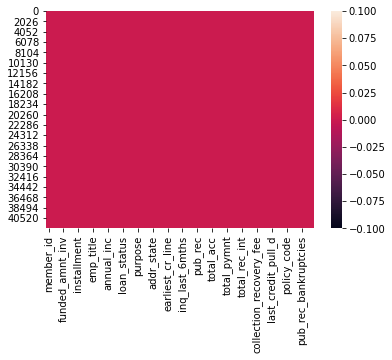

In [21]:
sns.heatmap(filled.isna())

In [22]:
filled.isnull().sum() * 100 / len(filled)

member_id                  0.0
loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_title                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
pymnt_plan                 0.0
desc                       0.0
purpose                    0.0
title                      0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
fico_range_low             0.0
fico_range_high            0.0
inq_last_6mths             0.0
mths_since_last_delinq     0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_ut

In [23]:
filled.to_csv('./data/clean.csv')

In [24]:
clean = pd.read_csv('./data/clean.csv', index_col=0)

### Standardize the Data

In [25]:
clean.acc_now_delinq.value_counts()

0.0    42531
1.0        4
Name: acc_now_delinq, dtype: int64

In [26]:
clean.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,meet_credit_policy
0,1296599.0,5000.0,5000.0,4975.0,36.0,10.65,162.87,0.0,0.0,2166.978765,...,171.62,1.472688e+09,744.0,740.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1314167.0,2500.0,2500.0,2500.0,60.0,15.27,59.83,1.0,1.0,1.000000,...,119.66,1.472688e+09,499.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1313524.0,2400.0,2400.0,2400.0,36.0,15.96,84.33,1.0,2.0,721.478503,...,649.91,1.472688e+09,719.0,715.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1277178.0,10000.0,10000.0,10000.0,36.0,13.49,339.31,1.0,3.0,2.000000,...,357.48,1.459469e+09,604.0,600.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1311748.0,3000.0,3000.0,3000.0,60.0,12.69,67.79,0.0,4.0,3.000000,...,67.79,1.472688e+09,694.0,690.0,1.0,0.0,0.0,0.0,0.0,0.0


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = pd.DataFrame(scaler.fit_transform(clean), columns=clean.columns)

In [43]:
scaled.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,meet_credit_policy
0,1.684555,-0.821731,-0.814569,-0.724217,-0.590645,-0.408592,-0.764644,-1.052549,-1.532735,-1.209827,...,-0.556675,0.841641,0.681962,0.534553,0.0,-0.009698,-0.00487,-0.229973,-0.007644,-0.262859
1,1.747401,-1.159074,-1.164374,-1.071264,1.693064,0.837399,-1.257836,-0.475941,-1.402702,-1.446590,...,-0.568524,0.841641,-2.372827,-5.683404,0.0,-0.009698,-0.00487,-0.229973,-0.007644,-0.262859
2,1.745101,-1.172567,-1.178366,-1.085286,-0.590645,1.023488,-1.140569,-0.475941,-1.272670,-1.367835,...,-0.447604,0.841641,0.370249,0.324487,0.0,-0.009698,-0.00487,-0.229973,-0.007644,-0.262859
3,1.615079,-0.147044,-0.114958,-0.019607,-0.590645,0.357342,0.079871,-0.475941,-1.142637,-1.446481,...,-0.514291,0.617720,-1.063631,-0.641817,0.0,-0.009698,-0.00487,-0.229973,-0.007644,-0.262859
4,1.738748,-1.091605,-1.094413,-1.001154,1.693064,0.141586,-1.219736,-1.052549,-1.012604,-1.446372,...,-0.580352,0.841641,0.058536,0.114421,0.0,-0.009698,-0.00487,-0.229973,-0.007644,-0.262859


In [44]:
scaled.loan_status.unique()
unMapStatus = {stat:i for i, stat in enumerate(scaled.loan_status.unique())}
unMapStatus

scaled['loan_status'] = scaled['loan_status'].replace(unMapStatus)
scaled['loan_status'] = scaled['loan_status'].map(lambda x: int(x))

In [45]:
defaulted = [6,9,1] ## show as True
paid = [0,8] ## show as False
to_drop = [2,3,4,5]

scaled['default'] = scaled['loan_status'].map(lambda x: 1 if x in defaulted else 0)

In [49]:
scaled = scaled.drop(scaled.loc[scaled.loan_status.isin(to_drop),:].index)

In [50]:
## drop loan_status column to avoid multicollinearity on the default and loan_status columns
scaled = scaled.drop(columns=['loan_status'])

In [51]:
scaled.default.value_counts()

0    36335
1     5654
Name: default, dtype: int64

<AxesSubplot:>

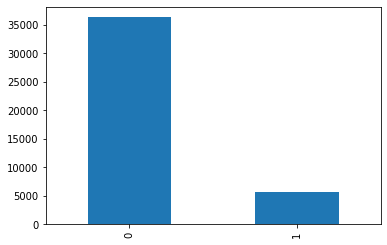

In [66]:
scaled.default.value_counts().plot.bar()

{'Fully Paid': 0,
 'Charged Off': 1,
 'Current': 2,
 'In Grace Period': 3,
 'Late (31-120 days)': 4,
 'Late (16-30 days)': 5,
 'Default': 6,
 nan: 7,
 'Does not meet the credit policy. Status:Fully Paid': 8,
 'Does not meet the credit policy. Status:Charged Off': 9}

## Pre-Processing

### <span id="preprocess">The Train - Test Split</span>

In [52]:
from sklearn.model_selection import train_test_split

X = scaled.drop(columns='default')
y = scaled.loc[:,['default']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Modeling

### Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [54]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='binary')

0.7494600431965442

### Adaboost

In [55]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

f1_score(y_test, y_pred, average='binary')

0.9865631531800538

In [56]:
print(clf.score(X_test,y_test))

0.9964277208859252


### Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X, y)
y_pred = clf.predict(X_test)

f1_score(y_test, y_pred, average='binary')

0.9778177458033573

### Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

f1_score(y_test, y_pred, average='binary')

0.3333002874987608

### Linear SVM

In [59]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

f1_score(y_test, y_pred, average='binary')

0.9877867143282693

## Conclusion

Linear SVM gave the best F1 score. I used this metric because it weighs precision and recall and is good for unbalanced data like the Lending Tree data. 